<a href="https://colab.research.google.com/github/Mayank-004/Handwritten-Digit-Character-Recognition-System/blob/main/Handwritten%20character%20recognition%20using%20GaussianNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import cv2
#import utils
import os
import time
random.seed(123)
from random import sample
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay,classification_report, f1_score,accuracy_score,plot_roc_curve,plot_precision_recall_curve


In [252]:
!pip install opencv-python


In [253]:
data = pd.read_csv("mnist_train.csv", error_bad_lines=False)
test = pd.read_csv("mnist_test.csv", error_bad_lines=False)



In [254]:
data

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59995,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [255]:
#Count Missing Data
missing = data.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / data.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent


In [256]:
print(data.shape)  # to check the shape
print(data.head(5))  # print the first 5 lines of the data

(59999, 785)
   5  0  0.1  0.2  0.3  0.4  ...  0.612  0.613  0.614  0.615  0.616  0.617
0  0  0    0    0    0    0  ...      0      0      0      0      0      0
1  4  0    0    0    0    0  ...      0      0      0      0      0      0
2  1  0    0    0    0    0  ...      0      0      0      0      0      0
3  9  0    0    0    0    0  ...      0      0      0      0      0      0
4  2  0    0    0    0    0  ...      0      0      0      0      0      0

[5 rows x 785 columns]


In [257]:
test.shape

(9999, 785)

In [258]:
even=[]
odd=[]
for i  in range(len(data)):  
    if data.iloc[i,0]% 2 == 0:
       even.append(i)
       #data.iloc[i,0] =0
    elif data.iloc[i,0]% 2 != 0:
        #data.iloc[i,0]=1
        odd.append(i)

In [259]:
data

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59995,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [260]:
# user defined function to assign even and odd label

def make_odd_even(y_train):
    for i  in range(len(y_train)):  
        if y_train.iloc[i,0]% 2 == 0:
        #even.append(i)
           y_train.iloc[i,0] =0
        elif y_train.iloc[i,0]% 2 != 0:
            y_train.iloc[i,0]=1
            #odd.append(i)

In [261]:
## defining a reusable function to evaluate model performance


def eval_result(model_name,X,y,y_pred):
    from matplotlib import pyplot as plt

    train_accuracy = accuracy_score(y, y_pred)
    print(f'accuracy is {train_accuracy}')
    
    plot_roc_curve(model_name, X, y)

    plot_precision_recall_curve(model_name,X,y)
    print(classification_report(y,y_pred,digits=5))
    plot_confusion_matrix(model_name, X, y,cmap=plt.cm.pink, normalize = 'all')


# user defined function to calculate training time
def run_model(model,X_train,y_train):
    t0=time.time()
    #if verbose== False:
    model.fit(X_train,y_train)
    time_taken= time.time()- t0
    print(f'Time taken: {time_taken}')

In [ ]:
X_test=test.iloc[:,1:]
y_test=test.iloc[:,0:1]

make_odd_even(y_test)

Experiment 1

In [263]:

even_sample300= sample(even,300)

data_even300=data.iloc[even_sample300]
data_odd300= data.iloc[odd]

data_300=pd.concat([data_even300,data_odd300],axis=0)

In [264]:
data_300

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
3474,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17997,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5791,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51311,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27310,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59991,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59992,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59993,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59995,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [265]:
X_train300=data_300.iloc[:,1:]
y_train300=data_300.iloc[:,0:1]

make_odd_even(y_train300)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [266]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(X_train300, y_train300)
run_model(model,X_train300, y_train300)



ypred_train300 = model.predict(X_train300)
ypred_test300 = model.predict(X_test)

#eval_result(model,X_train300, y_train300,ypred_train300)



/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time taken: 0.4401993751525879


accuracy is 0.5840584058405841
              precision    recall  f1-score   support

           0    0.54640   0.91677   0.68471      4926
           1    0.76355   0.26099   0.38901      5073

    accuracy                        0.58406      9999
   macro avg    0.65498   0.58888   0.53686      9999
weighted avg    0.65657   0.58406   0.53469      9999



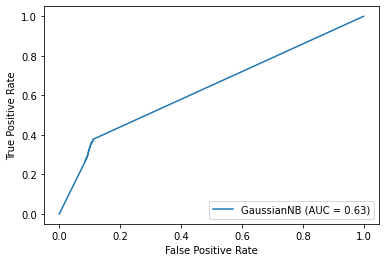

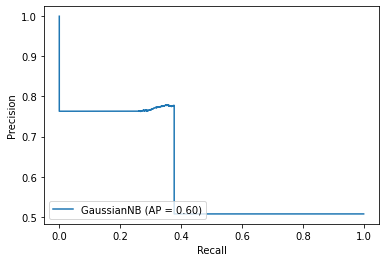

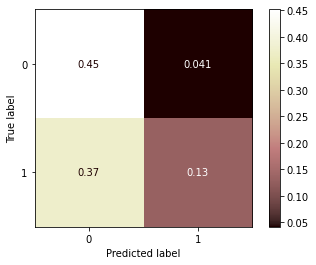

In [267]:
eval_result(model,X_test, y_test,ypred_test300)

Experiment 2

In [268]:


even_sample3000= sample(even,3000)

data_even3000=data.iloc[even_sample3000]
data_odd3000= data.iloc[odd]

data_3000=pd.concat([data_even3000,data_odd3000],axis=0)

In [ ]:
X_train3000=data_3000.iloc[:,1:]
y_train3000=data_3000.iloc[:,0:1]

make_odd_even(y_train3000)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(X_train3000, y_train3000)
run_model(model,X_train3000, y_train3000)



ypred_train3000 = model.predict(X_train3000)
ypred_test3000 = model.predict(X_test)

#eval_result(model,X_train3000, y_train3000,ypred_train3000)


accuracy is 0.6083608360836084
              precision    recall  f1-score   support

           0    0.55817   0.98376   0.71223      4926
           1    0.93926   0.24384   0.38717      5073

    accuracy                        0.60836      9999
   macro avg    0.74871   0.61380   0.54970      9999
weighted avg    0.75151   0.60836   0.54731      9999



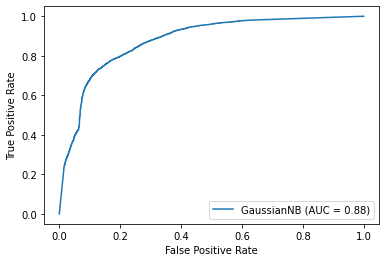

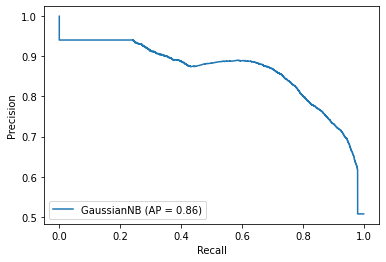

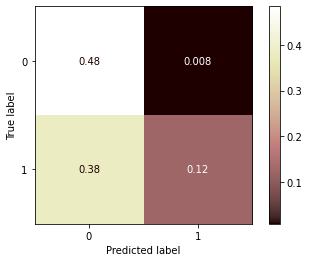

In [271]:
eval_result(model,X_test, y_test,ypred_test3000)

Experiment 3

In [272]:


even_sample6000= sample(even,6000)

data_even6000=data.iloc[even_sample6000]
data_odd6000= data.iloc[odd]

data_6000=pd.concat([data_even6000,data_odd6000],axis=0)

In [ ]:
X_train6000=data_6000.iloc[:,1:]
y_train6000=data_6000.iloc[:,0:1]

make_odd_even(y_train6000)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(X_train6000, y_train6000)
run_model(model,X_train6000, y_train6000)

ypred_train6000 = model.predict(X_train6000)
ypred_test6000 = model.predict(X_test)

#eval_result(model,X_train3000, y_train3000,ypred_train3000)


accuracy is 0.6141614161416141
              precision    recall  f1-score   support

           0    0.56218   0.98011   0.71452      4926
           1    0.93055   0.25882   0.40500      5073

    accuracy                        0.61416      9999
   macro avg    0.74636   0.61946   0.55976      9999
weighted avg    0.74907   0.61416   0.55748      9999



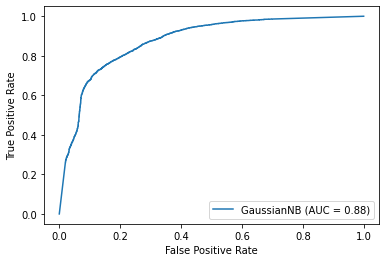

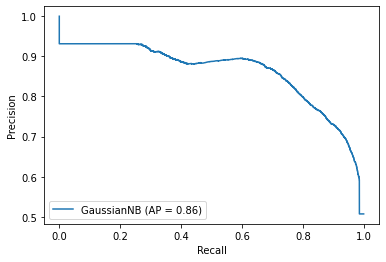

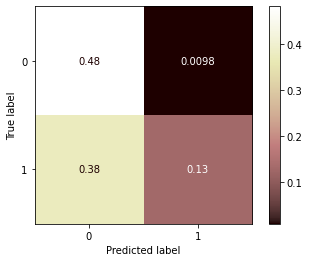

In [275]:
eval_result(model,X_test, y_test,ypred_test6000)

Experiment 4

In [276]:
even_sample12000= sample(even,12000)

data_even12000=data.iloc[even_sample12000]
data_odd12000= data.iloc[odd]

data_12000=pd.concat([data_even12000,data_odd12000],axis=0)

In [ ]:
X_train12000=data_12000.iloc[:,1:]
y_train12000=data_12000.iloc[:,0:1]

make_odd_even(y_train12000)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(X_train12000, y_train12000)
run_model(model,X_train12000, y_train12000)

ypred_train12000 = model.predict(X_train12000)
ypred_test12000 = model.predict(X_test)

#eval_result(model,X_train12000, y_train12000,ypred_train12000)


accuracy is 0.6538653865386539
              precision    recall  f1-score   support

           0    0.59137   0.96244   0.73260      4926
           1    0.90666   0.35423   0.50943      5073

    accuracy                        0.65387      9999
   macro avg    0.74901   0.65834   0.62101      9999
weighted avg    0.75133   0.65387   0.61937      9999



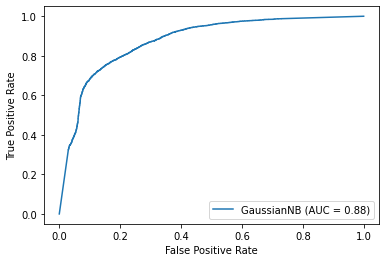

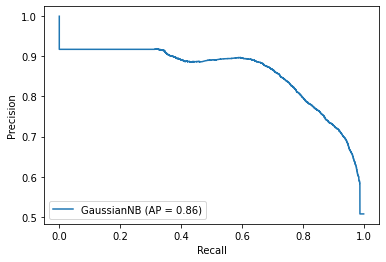

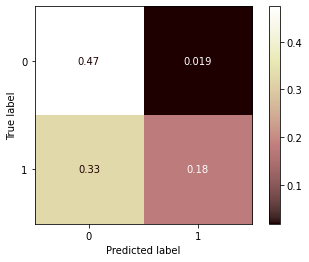

In [279]:
eval_result(model,X_test, y_test,ypred_test12000)

Experiment 5

In [280]:
even_sample15000= sample(even,15000)

data_even15000=data.iloc[even_sample15000]
data_odd15000= data.iloc[odd]

data_15000=pd.concat([data_even15000,data_odd15000],axis=0)

In [ ]:
X_train15000=data_15000.iloc[:,1:]
y_train15000=data_15000.iloc[:,0:1]

make_odd_even(y_train15000)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(X_train15000, y_train15000)
run_model(model,X_train15000, y_train15000)

ypred_train15000 = model.predict(X_train15000)
ypred_test15000 = model.predict(X_test)

#eval_result(model,X_train15000, y_train15000,ypred_train15000)


accuracy is 0.675967596759676
              precision    recall  f1-score   support

           0    0.61037   0.94641   0.74212      4926
           1    0.88818   0.41336   0.56416      5073

    accuracy                        0.67597      9999
   macro avg    0.74928   0.67989   0.65314      9999
weighted avg    0.75132   0.67597   0.65183      9999



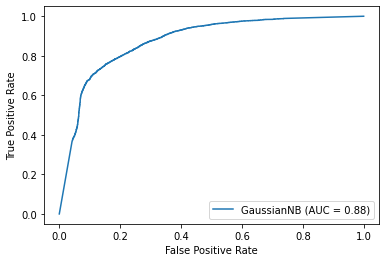

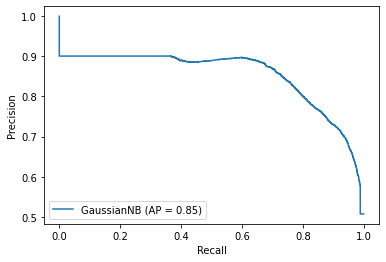

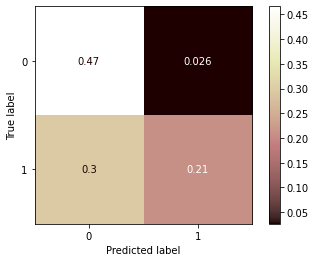

In [283]:
eval_result(model,X_test, y_test,ypred_test15000)

In [284]:
'''def convert2image(row):
    pixels = row  # In dataset,row heading was 'pixels'
    img = np.array(pixels)
    img = img.reshape(28,28)  # dimensions of the image
    image = np.zeros((28,28,3))  # empty matrix
    image[:,:,0] = img
    image[:,:,1] = img
    image[:,:,2] = img
    return image.astype(np.uint8) # return the image'''

"def convert2image(row):\n    pixels = row  # In dataset,row heading was 'pixels'\n    img = np.array(pixels)\n    img = img.reshape(28,28)  # dimensions of the image\n    image = np.zeros((28,28,3))  # empty matrix\n    image[:,:,0] = img\n    image[:,:,1] = img\n    image[:,:,2] = img\n    return image.astype(np.uint8) # return the image"

In [285]:
'''count = 0  # initialize counter
for i in range(1, X_train.shape[0]):  #data.shape[0] gives no. of rows
  face = X_train.iloc[i]  # remove one row from the data
  img = convert2image(face)  # send this row of to the function 
  # cv2.imshow("image", img) 
  # cv2.waitKey(0)  # closes the image window when you press a key   
  count+=1  # counter to save the images with different name         
  cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/datasets/ Handwritten Char Recog/Image'+ str(count) +'.jpg',img) # path of location'''

'count = 0  # initialize counter\nfor i in range(1, X_train.shape[0]):  #data.shape[0] gives no. of rows\n  face = X_train.iloc[i]  # remove one row from the data\n  img = convert2image(face)  # send this row of to the function \n  # cv2.imshow("image", img) \n  # cv2.waitKey(0)  # closes the image window when you press a key   \n  count+=1  # counter to save the images with different name         \n  cv2.imwrite(\'/content/drive/MyDrive/Colab Notebooks/datasets/ Handwritten Char Recog/Image\'+ str(count) +\'.jpg\',img) # path of location'